# 直接代入法

In [35]:
import numpy as np
# 定義數據點
x_points = np.array([0, 1, 2, 3])
y_points = np.array([1, 2, 0, 1])

def oneD_cubic_interpolation(x, y, input):
    # 建立方程式的矩陣
    A_matrix = np.array([
        [x[0]**3, x[0]**2, x[0]**1, x[0]**0],
        [x[1]**3, x[1]**2, x[1]**1, x[1]**0],
        [x[2]**3, x[2]**2, x[2]**1, x[2]**0],
        [x[3]**3, x[3]**2, x[3]**1, x[3]**0]
    ])
    
    # 解方程式
    coefficients = np.linalg.solve(A_matrix, y_points)
    print('Cofficients is ', coefficients)
    coefficients = coefficients[:, np.newaxis]
    # 顯示結果
    output = []
    for i in range(len(input)):
        # o = coefficients[0]*input[i]**3 + coefficients[1]*input[i]**2 + coefficients[2]*input[i] + coefficients[3]
        data = np.array([input[i]**3, input[i]**2, input[i]**1, input[i]**0])
        o = np.dot(data, coefficients)
        output.append(o)
    return output

input = np.linspace(0,3,100)
output = oneD_cubic_interpolation(x_points, y_points, input)

Cofficients is  [ 1.  -4.5  4.5  1. ]


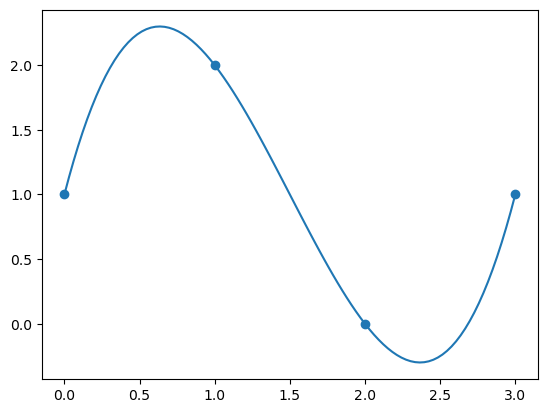

In [40]:
import matplotlib.pyplot as plt
plt.scatter(x_points, y_points)
plt.plot(input, output)
plt.show()

# 微分法

In [36]:
import numpy as np
# 定義數據點
x_points = np.array([0, 1, 2, 3])
y_points = np.array([1, 2, 0, 1])

def f(a,b,c,d, x):
    return a*x**3 + b*x**2 + c*x + d

def muf(a,b,c, x):
    return 3*a*x**2 + 2*b*x +c

d = y_points[0]
c = (y_points[1]-y_points[0])/(x_points[1]-x_points[0])
print(c)

1.0


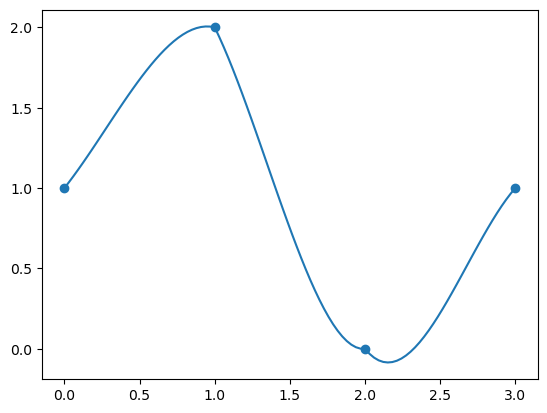

In [1]:
import numpy as np
from math import sqrt

def cubic_interp1d(x0, x, y):
    """
    Interpolate a 1-D function using cubic splines.
      x0 : a float or an 1d-array
      x : (N,) array_like
          A 1-D array of real/complex values.
      y : (N,) array_like
          A 1-D array of real values. The length of y along the
          interpolation axis must be equal to the length of x.

    Implement a trick to generate at first step the cholesky matrice L of
    the tridiagonal matrice A (thus L is a bidiagonal matrice that
    can be solved in two distinct loops).

    additional ref: www.math.uh.edu/~jingqiu/math4364/spline.pdf 
    """
    x = np.asfarray(x)
    y = np.asfarray(y)

    # remove non finite values
    # indexes = np.isfinite(x)
    # x = x[indexes]
    # y = y[indexes]

    # check if sorted
    if np.any(np.diff(x) < 0):
        indexes = np.argsort(x)
        x = x[indexes]
        y = y[indexes]

    size = len(x)

    xdiff = np.diff(x)
    ydiff = np.diff(y)

    # allocate buffer matrices
    Li = np.empty(size)
    Li_1 = np.empty(size-1)
    z = np.empty(size)

    # fill diagonals Li and Li-1 and solve [L][y] = [B]
    Li[0] = sqrt(2*xdiff[0])
    Li_1[0] = 0.0
    B0 = 0.0 # natural boundary
    z[0] = B0 / Li[0]

    for i in range(1, size-1, 1):
        Li_1[i] = xdiff[i-1] / Li[i-1]
        Li[i] = sqrt(2*(xdiff[i-1]+xdiff[i]) - Li_1[i-1] * Li_1[i-1])
        Bi = 6*(ydiff[i]/xdiff[i] - ydiff[i-1]/xdiff[i-1])
        z[i] = (Bi - Li_1[i-1]*z[i-1])/Li[i]

    i = size - 1
    Li_1[i-1] = xdiff[-1] / Li[i-1]
    Li[i] = sqrt(2*xdiff[-1] - Li_1[i-1] * Li_1[i-1])
    Bi = 0.0 # natural boundary
    z[i] = (Bi - Li_1[i-1]*z[i-1])/Li[i]

    # solve [L.T][x] = [y]
    i = size-1
    z[i] = z[i] / Li[i]
    for i in range(size-2, -1, -1):
        z[i] = (z[i] - Li_1[i-1]*z[i+1])/Li[i]

    # find index
    index = x.searchsorted(x0)
    np.clip(index, 1, size-1, index)

    xi1, xi0 = x[index], x[index-1]
    yi1, yi0 = y[index], y[index-1]
    zi1, zi0 = z[index], z[index-1]
    hi1 = xi1 - xi0

    # calculate cubic
    f0 = zi0/(6*hi1)*(xi1-x0)**3 + \
         zi1/(6*hi1)*(x0-xi0)**3 + \
         (yi1/hi1 - zi1*hi1/6)*(x0-xi0) + \
         (yi0/hi1 - zi0*hi1/6)*(xi1-x0)
    return f0

if __name__ == '__main__':
    import matplotlib.pyplot as plt
    x = np.array([0, 1, 2, 3])
    y = np.array([1, 2, 0, 1])
    plt.scatter(x, y)

    x_new = np.linspace(0, 3, 100)
    plt.plot(x_new, cubic_interp1d(x_new, x, y))

    plt.show()

# 用Scipy套件

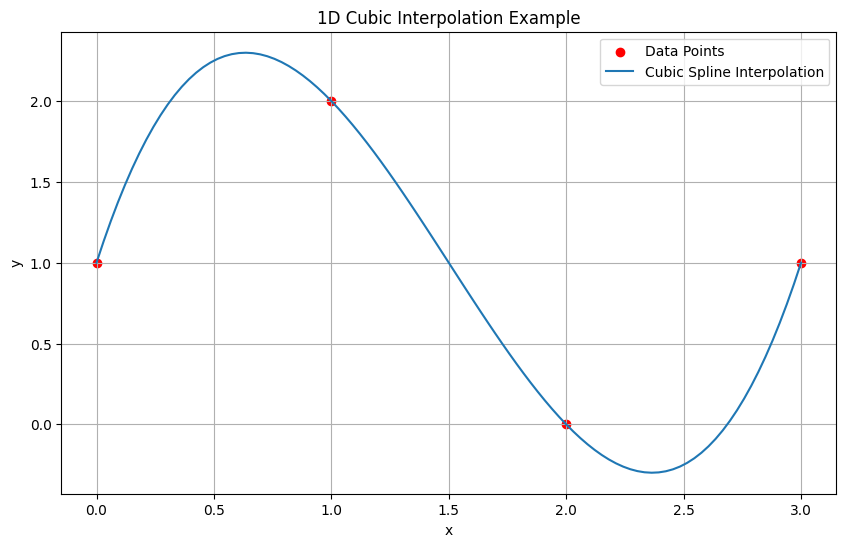

In [120]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

# 給定已知數據點
x_data = np.array([0, 1, 2, 3])
y_data = np.array([1, 2, 0, 1])

# 使用scipy的CubicSpline進行三次插值
cs = CubicSpline(x_data, y_data)

# 計算插值結果
x_new = np.linspace(0, 3, 100)
y_new = cs(x_new)

# 繪製圖表
plt.figure(figsize=(10, 6))
plt.scatter(x_data, y_data, color='red', label='Data Points')
plt.plot(x_new, y_new, label='Cubic Spline Interpolation')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('1D Cubic Interpolation Example')
plt.grid(True)
plt.show()


# Get it randomly Online

In [121]:
def deg3(a,b,c,d,g):  #using newton raphson method, I designed this to solve degree3 equations
    y=a*g**3+b*g**2+c*g+d
    return y

def solvedeg3equation():
    '''solves for cubic equations of the form ax^3+bx^2+cx+d=0 with the rough estimate of error within e'''
    import math
    e=float(input("e= "))
    a=float(input("a= "))
    b=float(input("b= "))
    c=float(input("c= "))
    d=float(input("d= "))
    count=1
    g=0.01
    while abs(deg3(a,b,c,d,g))>e and count<=100 and not d==0:
        count=count+1
        if 3*a*g**2+2*b*g+c==0:
            g=g+0.001
        g=g-deg3(a,b,c,d,g)/(3*a*g**2+2*b*g+c)
        
    if count <= 100:
       if d==0:
           a1=a
           b1=b
           c1=c
           g=0
       else:
           c1=-d/g                                 #This is generation 3, which provides all three solutions, including imaginary solutions, if any.
           a1=a
           b1=(c1-c)/g                             #imagg=imaginary part of root, realg=real part
       if b1**2-4*a1*c1<0:
           realg=-b1/(2*a1)
           imagg=math.sqrt(4*a1*c1-(b1**2))/(2*a1)
           if a1>0:
g2=str(realg)+'+'+str(imagg)+'i'
g3=str(realg)+'-'+str(imagg)+'i'
if a1<0:
g2=str(realg)+'+'+str(-imagg)+'i'
g3=str(realg)+'-'+str(-imagg)+'i'                
if abs(b1**2-4*a1*c1)<e:
g2=-b1/(2*a1)
g3=None
if b1**2-4*a1*c1>e:
g2=(-b1+math.sqrt(b1**2-4*a1*c1))/2*a1
g3=(-b1-math.sqrt(b1**2-4*a1*c1))/2*a1
print("Solved. The best guess is:",g,'and',g2,'and',g3)
print("Iterations required: ",count)
else:
print("Maximum iterations exceeded ")
print("Iterations: ",count,"Current guess: ",g)

IndentationError: expected an indented block after 'if' statement on line 34 (1289330202.py, line 35)

# 2D cubic interpolation for image processing

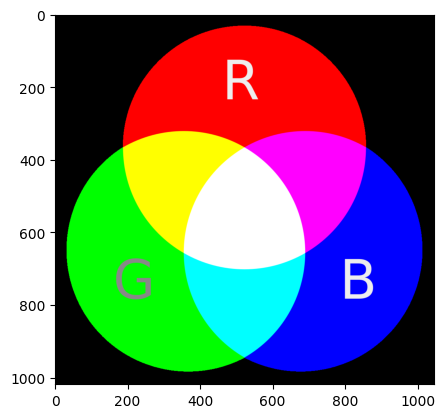

In [122]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 讀取影像
image = cv2.imread('/home/lui/Pictures/rgb.png')

# 定義填充的尺寸
top, bottom, left, right = (10, 10, 10, 10)

# 進行零填充
padded_image = cv2.copyMakeBorder(image, top, bottom, left, right, cv2.BORDER_CONSTANT, value=0)
image_rgb = cv2.cvtColor(padded_image, cv2.COLOR_BGR2RGB)
# 顯示填充後的影像
plt.imshow(image_rgb)
plt.show()
# cv2.imshow('Padded Image', padded_image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

## Interpolation with scipy

/tmp/ipykernel_3486/2978405294.py:12: DeprecationWarning: `interp2d` is deprecated!
`interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.13.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://scipy.github.io/devdocs/notebooks/interp_transition_guide.html`

  interp_func = interpolate.interp2d(xx, yy, z, kind='cubic')
/tmp/ipykernel_3486/2978405294.py:18: DeprecationWarning:         `interp2d` is deprecated!
        `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.13.0.

        For legacy code, nearly bug-for-bug compatible replacements are
        `RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
        scattered 2D data.

        In new code, 

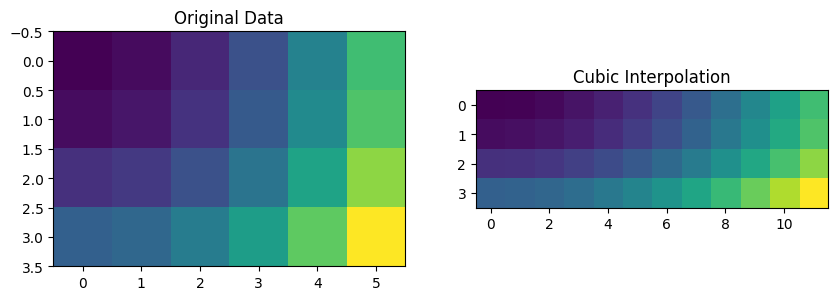

In [123]:
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt

# 创建一些示例数据（例如，一个简单的2D函数）
x = np.linspace(0, 6, 6)
y = np.linspace(0, 4, 4)
xx, yy = np.meshgrid(x, y)
z = (xx**2 + yy**2)

# 创建插值对象
interp_func = interpolate.interp2d(xx, yy, z, kind='cubic')

# 在更密集的网格上进行插值
xnew = np.linspace(0, 6, 12)
# ynew = np.linspace(0, 4, 8)
# znew = interp_func(xnew, ynew)
znew = interp_func(xnew, y)

# 绘制原始和插值数据
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].imshow(z)
axs[0].set_title('Original Data')
axs[1].imshow(znew)
axs[1].set_title('Cubic Interpolation')
plt.show()


In [124]:
z[0][3]

12.959999999999997

In [125]:
znew[0][6]

10.710743801652892

## My cubic interpolation

### Padding

[-1.3333333333333333, 0.0, 1.3333333333333333, 2.6666666666666665, 4.0, 5.333333333333334]


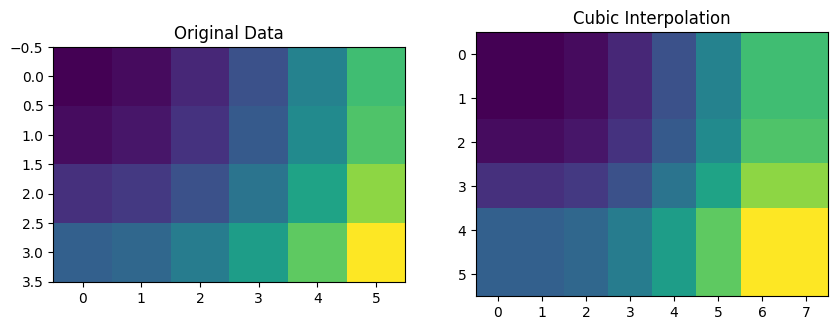

In [133]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 6, 6)
y = np.linspace(0, 4, 4)
xx, yy = np.meshgrid(x, y)
z = (xx**2 + yy**2)
# padding
height, width = z.shape
padding_x = []
for i in range(width+2):
    if i == 0:
        padding_x.append(-x[1])
    elif i==(width+1):
        gap = x[-1]-x[-2]
        padding_x.append(x[-1]+gap)
    else:
        padding_x.append(x[i-1])

padding_y = []
for i in range(height+2):
    if i==0:
        padding_y.append(-y[1])
    elif i==(height+1):
        gap = y[-1] - y[-2]
        padding_y.append(y[-1]+gap)
    else:
        padding_y.append(y[i-1])
print(padding_y)

padding_z = np.zeros((height+2, width+2))
for i in range(height):
    for j in range(width):
        # board
        if i == 0:
            padding_z[i][j+1] = z[i][j]
        if i==(height-1):
            padding_z[i+2][j+1] = z[i][j]
        if j==0:
            padding_z[i+1][j] = z[i][j]
        if j==(width-1):
            padding_z[i+1][j+2] = z[i][j]
        # 4 corners
        padding_z[0][0] = z[0][0]
        padding_z[0][-1] = z[0][-1]
        padding_z[-1][0] = z[-1][0]
        padding_z[-1][-1] = z[-1][-1]
        
        # Middle Part
        padding_z[i+1][j+1] = z[i][j]
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].imshow(z)
axs[0].set_title('Original Data')
axs[1].imshow(padding_z)
axs[1].set_title('Cubic Interpolation')
plt.show()


In [134]:
z

array([[ 0.        ,  1.44      ,  5.76      , 12.96      , 23.04      ,
        36.        ],
       [ 1.77777778,  3.21777778,  7.53777778, 14.73777778, 24.81777778,
        37.77777778],
       [ 7.11111111,  8.55111111, 12.87111111, 20.07111111, 30.15111111,
        43.11111111],
       [16.        , 17.44      , 21.76      , 28.96      , 39.04      ,
        52.        ]])

In [135]:
import warnings
# This function predict point between p1 and p2
# input point example: (x, y) = (0, 1)
# inputX is the point we want to predict
# always assume p1 is zero point
# always assume p0 is previous point for calculate differential
def my_cubic_equation(p0, p1, p2, p3, inputX):
    f0 = p1[1]
    f1 = p2[1]
    df0 = (p2[1]-p0[1])/(p2[0]-p0[0])
    df1 = (p3[1]-p1[1])/(p3[0]-p0[0])
    a = df1 + df0 - 2*f1 + 2*f0
    b = 3*f1 - 2*df0 - 3*f0 - df1
    c = df0
    d = f0
    print('a:%f, b:%f, c:%f, d:%f' %(a,b,c,d))
    inputX = inputX-p1[0]
    interval = p2[0]-p1[0]
    if inputX > interval or inputX < 0:
        warnings.warn('inputX is %f should locate between p1 %f and p2 %f' % (inputX, p1[0], p2[0]))
    return a*inputX**3 + b*inputX**2 + c*inputX + d

def my_cubic_equation2(p0, p1, p2, p3, input):
    # 建立方程式的矩陣
    A_matrix = np.array([
        [p0[0]**3, p0[0]**2, p0[0]**1, p0[0]**0],
        [p1[0]**3, p1[0]**2, p1[0]**1, p1[0]**0],
        [p2[0]**3, p2[0]**2, p2[0]**1, p2[0]**0],
        [p3[0]**3, p3[0]**2, p3[0]**1, p3[0]**0]
    ])
    
    # 解方程式
    y_points = np.array([p0[1], p1[1], p2[1], p3[1]])
    try:
        coefficients = np.linalg.solve(A_matrix, y_points)
    except:
        print(p0, p1, p2, p3)
    print('Cofficients is ', coefficients)
    coefficients = coefficients[:, np.newaxis]
    # 顯示結果
    data = np.array([input**3, input**2, input**1, input**0])
    output = np.dot(data, coefficients)
    return output[0]


p0 = (0,1)
p1 = (1,2)
p2 = (2,0)
p3 = (3,1)
my_cubic_equation(p0,p1,p2,p3, 1.5)
my_cubic_equation2(p0,p1,p2,p3, 1.5)

a:3.166667, b:-4.666667, c:-0.500000, d:2.000000
Cofficients is  [ 1.  -4.5  4.5  1. ]


1.0000000000000013

In [136]:
import numpy as np
import warnings
# 给定的数组
arr = np.array([0., 1.2, 2.4, 3.6, 4.8, 6.])

def find_interval(value, array):
    # 檢查值是否低於數組範圍
    if value < array[0]:
        warnings.warn("Value is below the range of the array")
    # 使用 searchsorted 找到索引
    if value == array[0]:
        index = np.searchsorted(array, value, side='right')
    else:
        index = np.searchsorted(array, value, side='left')
    # 檢查索引是否在數組的範圍內
    if index == len(array):
        warnings.warn("Value is above the range of the array")
    else:
        # print(f"Value is between index {index - 1} and {index}")
        return int(index-1), int(index)    

# 测试函数
value = 6
result = find_interval(value, arr)
print(result)  # 输出：Value is between index 0 and 1

(4, 5)


a:-0.680000, b:1.520000, c:0.600000, d:0.000000
a:-0.680000, b:1.520000, c:0.600000, d:0.000000
a:-0.680000, b:1.520000, c:0.600000, d:0.000000
a:-3.040000, b:4.960000, c:2.400000, d:1.440000
a:-3.040000, b:4.960000, c:2.400000, d:1.440000
a:-4.800000, b:7.200000, c:4.800000, d:5.760000
a:-4.800000, b:7.200000, c:4.800000, d:5.760000
a:-6.560000, b:9.440000, c:7.200000, d:12.960000
a:-6.560000, b:9.440000, c:7.200000, d:12.960000
a:-12.720000, b:16.080000, c:9.600000, d:23.040000
a:-12.720000, b:16.080000, c:9.600000, d:23.040000
a:-12.720000, b:16.080000, c:9.600000, d:23.040000
a:-0.680000, b:1.520000, c:0.600000, d:1.777778
a:-0.680000, b:1.520000, c:0.600000, d:1.777778
a:-0.680000, b:1.520000, c:0.600000, d:1.777778
a:-3.040000, b:4.960000, c:2.400000, d:3.217778
a:-3.040000, b:4.960000, c:2.400000, d:3.217778
a:-4.800000, b:7.200000, c:4.800000, d:7.537778
a:-4.800000, b:7.200000, c:4.800000, d:7.537778
a:-6.560000, b:9.440000, c:7.200000, d:14.737778
a:-6.560000, b:9.440000, c:7

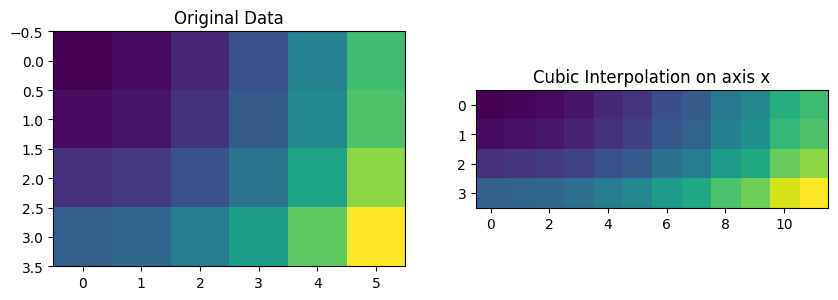

In [137]:
new_height = height*2
new_width = width*2
new_x = np.linspace(0, 6, new_width)
new_y = np.linspace(0, 4, new_height)
# do x-axis first
new_z_x = np.zeros((height, len(new_x)))
for i in range(height):
    for j in range(new_width):
        myFloor, myCeiling = find_interval(new_x[j], x)
        
        p0 = (padding_x[myFloor], padding_z[i+1][myFloor])
        p1 = (padding_x[myFloor+1], padding_z[i+1][myFloor+1])
        p2 = (padding_x[myFloor+2], padding_z[i+1][myFloor+2])
        p3 = (padding_x[myFloor+3], padding_z[i+1][myFloor+3])
        new_z_x_value = my_cubic_equation(p0, p1, p2, p3, new_x[j])
        new_z_x[i][j] = new_z_x_value

fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].imshow(z)
axs[0].set_title('Original Data')
axs[1].imshow(new_z_x)
axs[1].set_title('Cubic Interpolation on axis x')
plt.show()

In [118]:
z[0][0]

0.0

In [119]:
new_z_x[0][0]

0.0

### Padding Again

(6, 14)


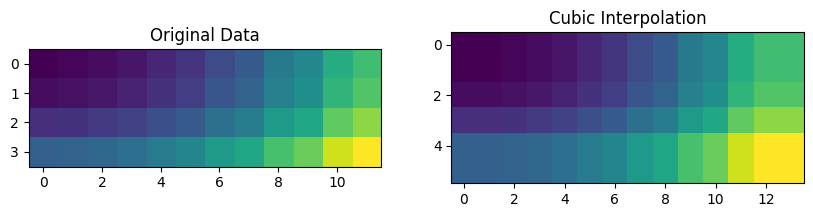

In [38]:
height, width = new_z_x.shape
padding_x = []
for i in range(width+2):
    if i == 0:
        padding_x.append(new_x[0])
    elif i==(width+1):
        padding_x.append(new_x[-1])
    else:
        padding_x.append(new_x[i-1])
# print(padding_x)

padding_y = []
for i in range(height+2):
    if i==0:
        padding_y.append(y[0])
    elif i==(height+1):
        padding_y.append(y[-1])
    else:
        padding_y.append(y[i-1])
# print(padding_y)

padding_z = np.zeros((height+2, width+2))
print(padding_z.shape)
for i in range(height):
    for j in range(width):
        # board
        if i == 0:
            padding_z[i][j+1] = new_z_x[i][j]
        if i==(height-1):
            padding_z[i+2][j+1] = new_z_x[i][j]
        if j==0:
            padding_z[i+1][j] = new_z_x[i][j]
        if j==(width-1):
            padding_z[i+1][j+2] = new_z_x[i][j]
        # 4 corners
        padding_z[0][0] = new_z_x[0][0]
        padding_z[0][-1] = new_z_x[0][-1]
        padding_z[-1][0] = new_z_x[-1][0]
        padding_z[-1][-1] = new_z_x[-1][-1]
        padding_z[i+1][j+1] = new_z_x[i][j]
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].imshow(new_z_x)
axs[0].set_title('Original Data')
axs[1].imshow(padding_z)
axs[1].set_title('Cubic Interpolation')
plt.show()


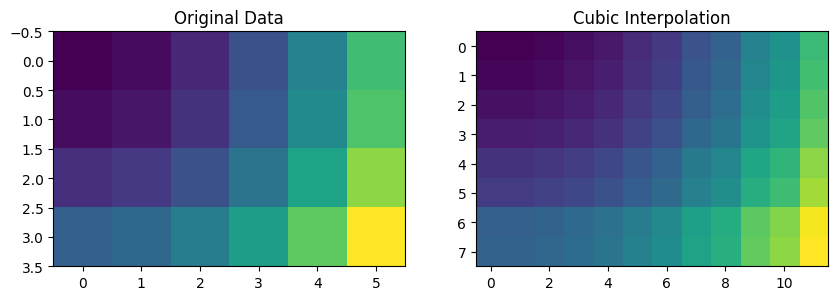

In [39]:
new_z_y = np.zeros((len(new_y), len(new_x)))
new_z_y = np.zeros((new_height, new_width))
for i in range(new_width):
    for j in range(new_height):
        myFloor, myCeiling = find_interval(new_y[j], y)
        # print('myFloor: ', myFloor)
        # print('myCeiling: ', myCeiling)padding_y
        p0 = (padding_y[myFloor], padding_z[myFloor][i])
        p1 = (padding_y[myFloor+1], padding_z[myFloor+1][i])
        p2 = (padding_y[myFloor+2], padding_z[myFloor+2][i])
        p3 = (padding_y[myFloor+3], padding_z[myFloor+3][i])
        new_z_y_value = my_cubic_equation(p0, p1, p2, p3, new_y[j])
        new_z_y[j][i] = new_z_y_value
        
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].imshow(z)
axs[0].set_title('Original Data')
axs[1].imshow(new_z_y)
axs[1].set_title('Cubic Interpolation')
plt.show()

In [ ]:
# Method2 Result

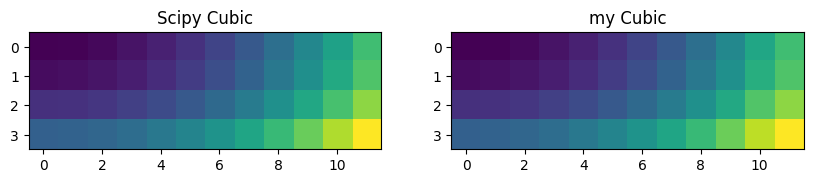

2.0869607037503615


In [131]:
## Compare Scipy and Mine
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].imshow(znew)
axs[0].set_title('Scipy Cubic')
axs[1].imshow(new_z_x)
axs[1].set_title('my Cubic')
plt.show()

height, width = znew.shape
error = 0
for i in range(height):
    for j in range(width):
        error += (znew[i][j]-new_z_x[i][j])**2
print(np.sqrt(error))

In [139]:
# Method 1 Result

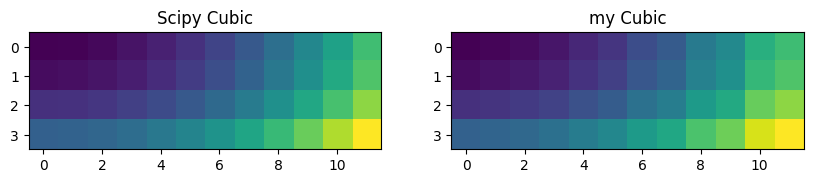

8.148889502127895


In [138]:
## Compare Scipy and Mine
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].imshow(znew)
axs[0].set_title('Scipy Cubic')
axs[1].imshow(new_z_x)
axs[1].set_title('my Cubic')
plt.show()

height, width = znew.shape
error = 0
for i in range(height):
    for j in range(width):
        error += (znew[i][j]-new_z_x[i][j])**2
print(np.sqrt(error))

In [13]:
z

array([[ 0.        ,  0.99145835, -0.49964188,  0.38354276, -0.86685116,
        -0.99177885],
       [ 0.9786557 , -0.07611145,  0.95042272,  0.82499056, -0.30978172,
         0.07858482],
       [ 0.73652996,  0.76668828,  0.30004564,  0.93963265, -0.95355194,
        -0.76509319],
       [-0.28790332, -0.9870289 ,  0.2290957 , -0.63318873,  0.97368733,
         0.98662759]])